# Lecture 9: Constructor design and operators

## Class operators

Class operators are defined by using double underscores in front of the operator name. For example, the addition operator is defined by the `__add__` method. The following example shows how to define the addition operator for a class that represents a complex number.

```python
class Complex:
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag

    def __add__(self, other):
        return Complex(self.real + other.real, self.imag + other.imag)

    def __str__(self):
        return f"{self.real} + {self.imag}i"
```




In [3]:
class Vector:
    def __init__(self,n,scalar=0) -> None:
        # the -> None is a type hint, it tells us that the function returns nothing
        # similar to type void in other languages
        self._data = [scalar]*n
        self._n = n

    def __str__(self):
        return str(self._data)
    
    def __add__(self,other):
        if self._n != other._n:
            raise ValueError("Vector sizes must match")
        result = Vector(self._n)
        for i, (d1,d2) in enumerate(zip(self._data,other._data)):
            result._data[i] = d1+d2
        return result

v1 = Vector(1,3)
v2 = Vector(2,3)
print(v1)
print(v2)
print(v1+v2)

[1, 1, 1]
[2, 2, 2]
[3, 3, 3]


## Linear layer using __call__

In [34]:
import numpy as np

class lin_layer:
    def __init__(self,rows,cols):
        self._w = np.random.randn(rows,cols)
        self._b = np.random.randn(rows)
        self.activation = lambda x: np.maximum(0,x)

    def __call__(self,x):
        return self.activation(self._w@x+self._b)

rows = 10
cols = 5

layer = lin_layer(rows,cols)
x = np.random.randn(cols)
print(layer(x))

[0.         2.40902699 1.30622863 3.90397073 1.69091462 1.72981464
 0.         0.         6.79168846 0.74355688]


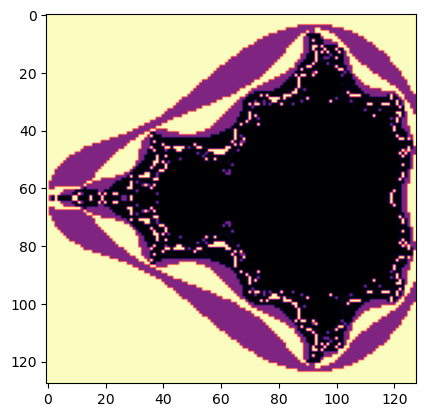

In [50]:
# we want to generate a julia set

def julia_set(xmin,xmax,ymin,ymax,width,height,maxiter=256):
    x = np.linspace(xmin,xmax,width)
    y = np.linspace(ymin,ymax,height)
    c = 1#-0.8+0.156j
    z = x[:,None]+1j*y[None,:]
    julia = np.zeros(z.shape)
    for i in range(maxiter):
        z = z**2+c
        mask = np.abs(z)>2
        julia[mask] = np.log(i+1)
        z[mask] = 0
    return julia

def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter=256):
    x = np.linspace(xmin,xmax,width)
    y = np.linspace(ymin,ymax,height)
    c = x[:,None]+1j*y[None,:]
    z = c.copy()
    mandelbrot = np.zeros(z.shape)
    for i in range(maxiter):
        z = z**2+c
        mask = np.abs(z)>2
        mandelbrot[mask] = i
        z[mask] = c[mask]
    return np.exp(mandelbrot)
    

import matplotlib.pyplot as plt

julia = julia_set(-1.5,1.5,-1.5,1.5,64,64)
mandelbrot = mandelbrot_set(-2,0.5,-1.25,1.25,128,128)
plt.imshow(mandelbrot.T,cmap="magma")

#plt.imshow(julia)
plt.show()

## Factories

factories are functions that returns other functions or classes.

In [56]:
def make_multiplier(x):
    def multiplier(y):
        return x*y
    return multiplier

mult2 = make_multiplier(2)
mult3 = make_multiplier(3)
mult_a = make_multiplier("a")

print(mult2(3),mult3("kB"),mult_a(4))

6 kBkBkB aaaa


**Example**

In [ ]:
class type_cat:
    def __init__(self,age) -> None:
        self._age = age

class type_dog:
    def __init__(self,age) -> None:
        self._age = age

class type_bird:
    def __init__(self,age) -> None:
        self._age = age

animal_info = [{"type" : "type_dog", "age" : 3},
               {"type" : "type_cat", "age" : 2},
               {"type" : "type_bird", "age" : 5}]

def make_animal(animal):
    animal["type"]

In [57]:
class type_cat:
    def __init__(self,age) -> None:
        self._age = age

class type_dog:
    def __init__(self,age) -> None:
        self._age = age

class type_bird:
    def __init__(self,age) -> None:
        self._age = age

class factory:
    def __init__(self) -> None:
        self._animal_types = {"dog":type_dog,
                              "cat":type_cat,
                              "bird":type_bird}
    
    def __call__(self,animal):
        return self._animal_types[animal["type"]](animal["age"])

f = factory()

animal_info = [{"type" : "dog", "age" : 3},
               {"type" : "cat", "age" : 2},
               {"type" : "bird", "age" : 5}]

animal_list = []

for animal in animal_info:
    animal_list.append(f(animal))

print(animal_list)

[<__main__.type_dog object at 0x0000021F0BEDCB80>, <__main__.type_cat object at 0x0000021F0BEDE020>, <__main__.type_bird object at 0x0000021F0BEDC370>]


## Redoing exercise 6 using factories


In [ ]:
nn_architecture = [{"type":"relu","size":(512,784)},
                   {"type":"relu","size":(512,256)},
                   {"type":"relu","size":(256,128)}]
